
# 1. Gradient Descent (No Optimization)

- In this implementation, we simply use gradient descent to find the optimal parameters for the linear regression model.
- We use the mean squared error as the loss function.
- There is no optimization for the learning rate, so the learning rate is constant.

---

In [1]:
# - The loss is around 0.8 , which is the similar to the noise variance
# - THe model fits the dataset well, but the loss is high because of the noise

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from prettytable import PrettyTable

np.random.seed(42)

In [3]:
def show_history(history: dict):
    """
    Display the training history in a tabular format.

    Args:
        history (dict): A dictionary containing the training history with keys as column names and values as lists of data points.
    """
    # Create a PrettyTable object to display the history
    table = PrettyTable()

    # Add each key and its corresponding values as a column in the table
    for key in history.keys():
        table.add_column(key, history[key])

    # Print the table
    print(table)

In [4]:
MAX_EPOCHS = 150*3
MAX_LOSS = 0.001

# Set target values for k and b
TARGET_K = np.random.randint(-10, 10)
TARGET_B = np.random.randint(-10, 10)

# Generate sample data
X = np.linspace(-100, 100, 200)
X = (X - np.mean(X)) / np.std(X) # Normalize the data
# X - mean(X) simply sets the mean of X to 0
# X / std(X) simply sets the standard deviation of X to 1

y = TARGET_K * X + TARGET_B + np.random.normal(0, 1, len(X))

# Shuffle the data
indices = np.arange(len(X))
np.random.shuffle(indices)

X = X[indices]
y = y[indices]


# Split the data into training and testing sets
# 80% of the data will be used for training and 20% for testing
split = 0.8
split = int(split * len(X))

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]


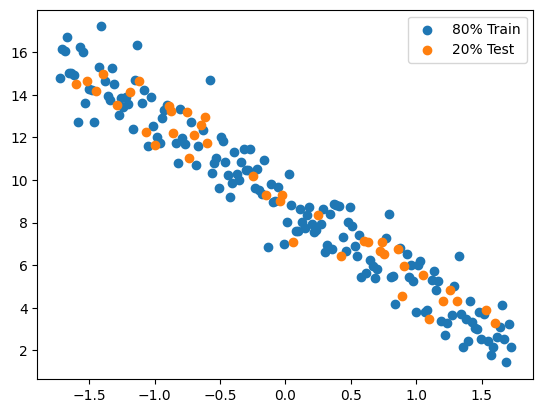

In [5]:
plt.scatter(X_train, y_train, label='80% Train')
plt.scatter(X_test, y_test, label='20% Test')
plt.legend()
plt.show()

In [6]:
# Initialize history dictionary to store training data
history = {
    "epoch": [],
    "loss": [],
    "k": [],
    "b": [],
    "k_gradient": [],
    "k_lr": [],
    "b_gradient": [],
    "b_lr": [],
}


# Initialize k and b with random values greater than 0
k = np.random.rand() + 0.01
b = np.random.rand() + 0.01

# Set initial learning rates for k and b
initial_k_lr = 0.01
initial_b_lr = 0.01
k_lr = initial_k_lr
b_lr = initial_b_lr

In [7]:
epoch = 0

while True:
    # Predict y values using the current values of k and b
    y_pred = k * X_train + b

    # Calculate the errors
    errors = y_pred - y_train

    # Calculate the loss
    loss = np.mean(np.abs(errors))

    if loss <= MAX_LOSS or epoch >= MAX_EPOCHS:
        print("The training finished..")
        print(f"Epochs: {epoch}")
        print(f"Loss: {loss:.4f}")
        print(f"Variable `k`: {k:.2f}")
        print(f"Variable `b`: {b:.2f}")
        break

    # Calculate the gradients for k and b (MSE loss function)
    k_gradient = (2 / len(X_train)) * np.sum(errors * X_train)
    b_gradient = (2 / len(X_train)) * np.sum(errors)

    # # Update k and b using the gradients and learning rates
    k = k - k_gradient * k_lr
    b = b - b_gradient * b_lr

    # Store the current epoch's data in the history dictionary
    history["epoch"].append(epoch)
    history["k"].append(k)
    history["b"].append(b)
    history["loss"].append(loss)
    history["k_gradient"].append(k_gradient)
    history["k_lr"].append(k_lr)
    history["b_gradient"].append(b_gradient)
    history["b_lr"].append(b_lr)

    epoch += 1

The training finished..
Epochs: 450
Loss: 0.8026
Variable `k`: -3.89
Variable `b`: 9.02


In [8]:
test_pred = k * X_test + b
test_loss = np.mean(np.abs(test_pred - y_test))
print(f"Test loss: {test_loss:.4f}")

Test loss: 0.6845


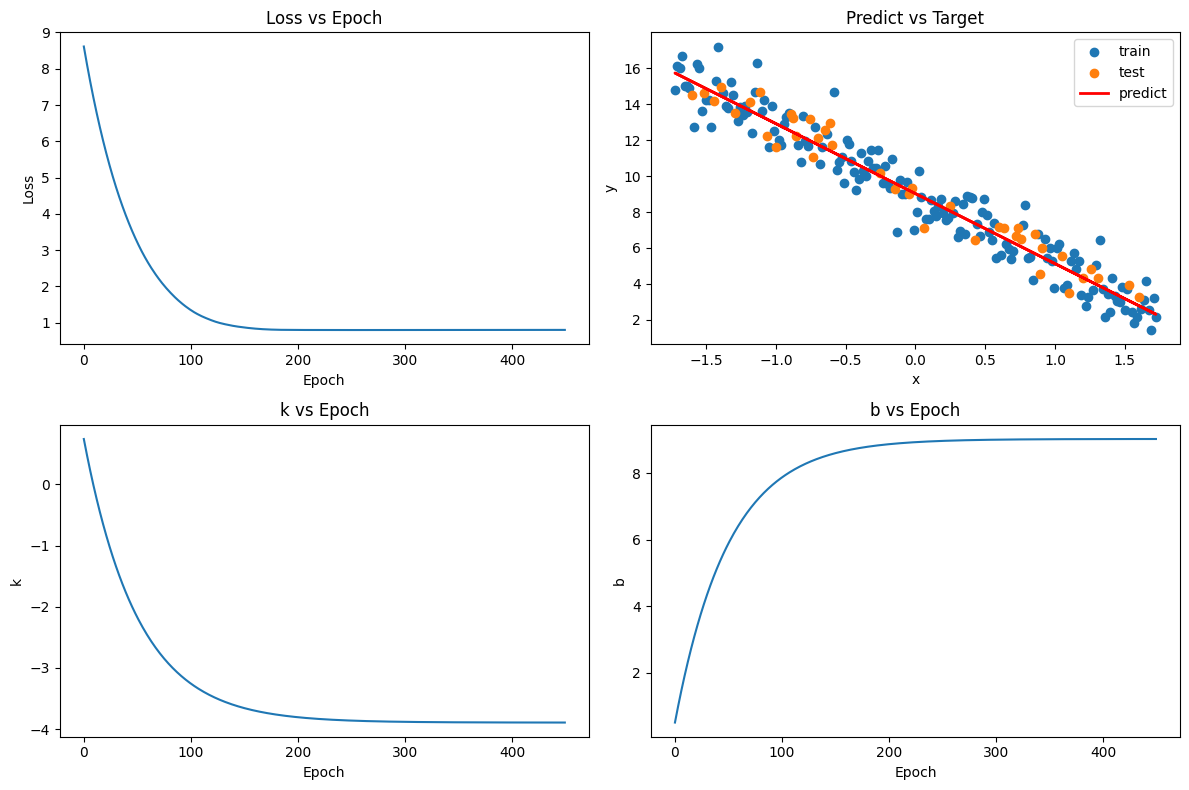

In [ ]:
# 1st plot - loss vs epoch
# 2nd plot - predict vs target
# 3rd plot - k vs epoch
# 4th plot - b vs epoch

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].plot(history["epoch"], history["loss"])
ax[0, 0].set_title("Loss vs Epoch")
ax[0, 0].set_xlabel("Epoch")
ax[0, 0].set_ylabel("Loss")

ax[0, 1].scatter(X_train, y_train, label="train")
ax[0, 1].scatter(X_test, y_test, label="test")
ax[0, 1].plot(X, k * X + b, label="predict", color="red", linewidth=2)
ax[0, 1].set_xlabel("x")
ax[0, 1].set_ylabel("y")
ax[0, 1].legend()
ax[0, 1].set_title("Predict vs Target")


ax[1, 0].plot(history["epoch"], history["k"])
ax[1, 0].set_title("k vs Epoch")
ax[1, 0].set_xlabel("Epoch")
ax[1, 0].set_ylabel("k")

ax[1, 1].plot(history["epoch"], history["b"])
ax[1, 1].set_title("b vs Epoch")
ax[1, 1].set_xlabel("Epoch")
ax[1, 1].set_ylabel("b")

plt.tight_layout()
plt.show()